## Problem statement:

Analysing, how price vary across Chennai area. And which kind of food Chennai people mostly and so on.

### Column details:
+ URL of the particular Zomato Listing	
+ Name of Restaurant : Name of the Restaurant
+ Address : Detailed Address of that particular branch of Restaurant
+ Location : Broad Geographical location in Chennai
+ Cuisine : Cuisine the restaurant serve
+ Top Dishes : Most Popular or talked about dishes
+ Price for 2 : Average price for 2
+ Ratings : Zomato's average user ratings
+ No of Votes : No of votes polled for that rating

In [1]:
## Including the all necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 


In [2]:
## Reading the input file

df = pd.read_csv("Chennai_Zomato_Data_Updated.csv")

In [3]:
df.head()

,Unnamed: 0,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Ratings,No of Votes
0,0,https://www.zomato.com/chennai/the-big-barbequ...,The Big Barbeque,"5/360, Okkiyum Thoraipakkam Rajiv Gandhi Sala...",Old Mahabalipuram Road (OMR),"North Indian, Street Food, Desserts, BBQ","Pizza,Appam,Ice Cream Roll",1400.0,invalid,invalid
1,1,https://www.zomato.com/chennai/abs-absolute-ba...,AB's - Absolute Barbecues,"45, GN Chetty Road, T. Nagar, Chennai",T. Nagar,"BBQ, North Indian, European","Paan Ice Cream,Fish,Prawn,Gulab Jamun,Biryani,...",1400.0,4.8,10997
2,2,https://www.zomato.com/chennai/mcdonalds-velac...,McDonald's,"330/12, Grand Arcade, Dr Seetharaman Nagar, V...",Velachery,"Burger, Fast Food","Burgers,Peri Peri Fries,French Fries,Maharaja ...",500.0,3.9,698
3,3,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"Biryani, North Indian, Mughlai, Desserts, Beve...","Beef Biryani,Beef Fry,Paratha,Paya,Chicken Bir...",1000.0,4.4,2625
4,4,https://www.zomato.com/chennai/coal-barbecues-...,Coal Barbecues,"40, 2nd Floor, Bazullah Road, T. Nagar, Chennai",T. Nagar,"North Indian, Chinese","Chicken Honey,Pizza,Fish,Kulfi,Prawn,Chicken W...",1400.0,4.9,8737


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8505 entries, 0 to 8504
Data columns (total 10 columns):
Unnamed: 0            8505 non-null int64
Zomato URL            8505 non-null object
Name of Restaurant    8505 non-null object
Address               8505 non-null object
Location              8505 non-null object
Cuisine               8505 non-null object
Top Dishes            8505 non-null object
Price for 2           8505 non-null float64
Ratings               8505 non-null object
No of Votes           8505 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 664.6+ KB


So most of the column data types are object except "serial no" and "price for 2" column

In [5]:
df.columns

Index(['Unnamed: 0', 'Zomato URL', 'Name of Restaurant', 'Address', 'Location',
       'Cuisine', 'Top Dishes', 'Price for 2', 'Ratings', 'No of Votes'],
      dtype='object')

In [6]:
df.rename(columns={'Unnamed: 0' : 'S.No'},inplace=True)

In [7]:
df

,S.No,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Ratings,No of Votes
0,0,https://www.zomato.com/chennai/the-big-barbequ...,The Big Barbeque,"5/360, Okkiyum Thoraipakkam Rajiv Gandhi Sala...",Old Mahabalipuram Road (OMR),"North Indian, Street Food, Desserts, BBQ","Pizza,Appam,Ice Cream Roll",1400.0,invalid,invalid
1,1,https://www.zomato.com/chennai/abs-absolute-ba...,AB's - Absolute Barbecues,"45, GN Chetty Road, T. Nagar, Chennai",T. Nagar,"BBQ, North Indian, European","Paan Ice Cream,Fish,Prawn,Gulab Jamun,Biryani,...",1400.0,4.8,10997
2,2,https://www.zomato.com/chennai/mcdonalds-velac...,McDonald's,"330/12, Grand Arcade, Dr Seetharaman Nagar, V...",Velachery,"Burger, Fast Food","Burgers,Peri Peri Fries,French Fries,Maharaja ...",500.0,3.9,698
3,3,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"Biryani, North Indian, Mughlai, Desserts, Beve...","Beef Biryani,Beef Fry,Paratha,Paya,Chicken Bir...",1000.0,4.4,2625
4,4,https://www.zomato.com/chennai/coal-barbecues-...,Coal Barbecues,"40, 2nd Floor, Bazullah Road, T. Nagar, Chennai",T. Nagar,"North Indian, Chinese","Chicken Honey,Pizza,Fish,Kulfi,Prawn,Chicken W...",1400.0,4.9,8737
...,...,...,...,...,...,...,...,...,...,...
8500,8500,https://www.zomato.com/chennai/tarsan-cafe-myl...,Tarsan Cafe,"10 & 11 Ground Floor, Citi Center Mall, Mylap...",Mylapore,"Sandwich, Beverages",Invalid,100.0,invalid,invalid
8501,8501,https://www.zomato.com/chennai/new-bombay-tea-...,New Bombay Tea Center,"New 119, Old 53, East Kalmandabam Road, Royap...",Royapuram,Beverages,Invalid,100.0,invalid,invalid
8502,8502,https://www.zomato.com/chennai/susas-shawarma-...,Susa's Shawarma,"5, Main Ambedkar Nagar, Kodambakkam, Chennai",Kodambakkam,"Lebanese, Fast Food",Invalid,200.0,invalid,invalid
8503,8503,https://www.zomato.com/chennai/beef-kari-velac...,Beef Kari,"Plot 206, Srinivasa Nagar, Inner Ring Road, V...",Velachery,Biryani,Invalid,300.0,invalid,invalid


In [8]:
df.shape

(8505, 10)

We have 8505 rows or entries and 10 columns in the data set

#### Finding the missing values

In [9]:
df.isnull().sum()

S.No                  0
Zomato URL            0
Name of Restaurant    0
Address               0
Location              0
Cuisine               0
Top Dishes            0
Price for 2           0
Ratings               0
No of Votes           0
dtype: int64

Which means no column values were empty, So it was filled with some key word like "invalid". So we need to identify the invalid values column.

In [10]:
## Replacing "invalid" string value to NaN

df1 = df.replace('invalid',np.NaN)

In [11]:
df1.isnull().sum()

S.No                     0
Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Ratings               3034
No of Votes           3037
dtype: int64

In [12]:
## Calculating % data has a missing value compare to total data

for feature in df1.columns:
    if df1[feature].isnull().sum() > 1:
        print(feature,"Has",round((df1[feature].isnull().sum()/df.shape[0])*100,1),"% of missing values")

Ratings Has 35.7 % of missing values
No of Votes Has 35.7 % of missing values


OR using mean() method

In [13]:
for feature in df1.columns:
    if df1[feature].isnull().sum() > 1:
        print(feature,"Has",round(df1[feature].isnull().mean()*100,1),"% of missing values")

Ratings Has 35.7 % of missing values
No of Votes Has 35.7 % of missing values


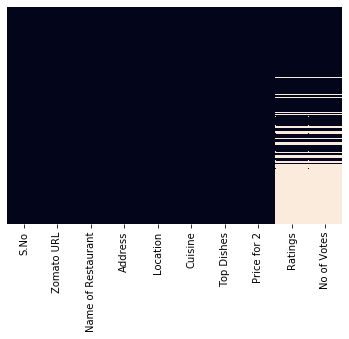

In [14]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

Mostly where ever Rating column values are misssing then the equalant No of Votes values are missing

<BarContainer object of 10 artists>

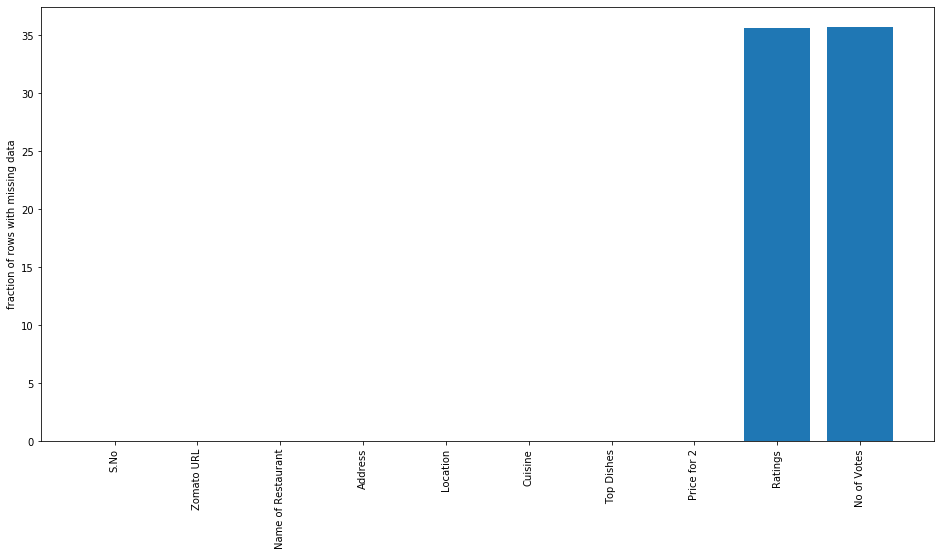

In [15]:
null_counts = (df1.isnull().sum()/len(df1))*100
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [16]:
Loc = df.Location
Exact_loc = []
for i in Loc:
    if i.find(','):
        data = i.split(", ")
        i = data[-1]
        Exact_loc.append(i)
    else:
        Exact_loc.append(i)

df1['Ex_loc'] = Exact_loc
df1

,S.No,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Ratings,No of Votes,Ex_loc
0,0,https://www.zomato.com/chennai/the-big-barbequ...,The Big Barbeque,"5/360, Okkiyum Thoraipakkam Rajiv Gandhi Sala...",Old Mahabalipuram Road (OMR),"North Indian, Street Food, Desserts, BBQ","Pizza,Appam,Ice Cream Roll",1400.0,NaN,NaN,Old Mahabalipuram Road (OMR)
1,1,https://www.zomato.com/chennai/abs-absolute-ba...,AB's - Absolute Barbecues,"45, GN Chetty Road, T. Nagar, Chennai",T. Nagar,"BBQ, North Indian, European","Paan Ice Cream,Fish,Prawn,Gulab Jamun,Biryani,...",1400.0,4.8,10997,T. Nagar
2,2,https://www.zomato.com/chennai/mcdonalds-velac...,McDonald's,"330/12, Grand Arcade, Dr Seetharaman Nagar, V...",Velachery,"Burger, Fast Food","Burgers,Peri Peri Fries,French Fries,Maharaja ...",500.0,3.9,698,Velachery
3,3,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"Biryani, North Indian, Mughlai, Desserts, Beve...","Beef Biryani,Beef Fry,Paratha,Paya,Chicken Bir...",1000.0,4.4,2625,Alandur
4,4,https://www.zomato.com/chennai/coal-barbecues-...,Coal Barbecues,"40, 2nd Floor, Bazullah Road, T. Nagar, Chennai",T. Nagar,"North Indian, Chinese","Chicken Honey,Pizza,Fish,Kulfi,Prawn,Chicken W...",1400.0,4.9,8737,T. Nagar
...,...,...,...,...,...,...,...,...,...,...,...
8500,8500,https://www.zomato.com/chennai/tarsan-cafe-myl...,Tarsan Cafe,"10 & 11 Ground Floor, Citi Center Mall, Mylap...",Mylapore,"Sandwich, Beverages",Invalid,100.0,NaN,NaN,Mylapore
8501,8501,https://www.zomato.com/chennai/new-bombay-tea-...,New Bombay Tea Center,"New 119, Old 53, East Kalmandabam Road, Royap...",Royapuram,Beverages,Invalid,100.0,NaN,NaN,Royapuram
8502,8502,https://www.zomato.com/chennai/susas-shawarma-...,Susa's Shawarma,"5, Main Ambedkar Nagar, Kodambakkam, Chennai",Kodambakkam,"Lebanese, Fast Food",Invalid,200.0,NaN,NaN,Kodambakkam
8503,8503,https://www.zomato.com/chennai/beef-kari-velac...,Beef Kari,"Plot 206, Srinivasa Nagar, Inner Ring Road, V...",Velachery,Biryani,Invalid,300.0,NaN,NaN,Velachery


In [17]:
df1.Ex_loc.unique()

array(['Old Mahabalipuram Road (OMR)', 'T. Nagar', 'Velachery', 'Alandur',
       'Pallavaram', 'Sholinganallur', 'Kodambakkam', 'Alwarpet',
       'Thuraipakkam', 'Mogappair', 'Kilpauk', 'Porur', 'Adyar',
       'Nungambakkam', 'Perungudi', 'Ramapuram', 'Anna Nagar East',
       'Mylapore', 'West Mambalam', 'Ambattur', 'Perambur',
       'Purasavakkam', 'Vadapalani', 'Egatoor', 'Potheri', 'Navallur',
       'Aminijikarai', 'GST Road', 'East Coast Road (ECR)', 'Ashok Nagar',
       'Choolaimedu', 'Kotturpuram', 'Medavakkam', 'Chromepet', 'Egmore',
       'Karapakkam', 'Kanathur', 'Triplicane', 'Semmancheri',
       'Thousand Lights', 'MRC Nagar', 'Neelangarai', 'Tambaram',
       'Express Avenue Mall,Royapettah', 'Gopalapuram', 'Guindy',
       'Anna Nagar West', 'Grand by GRT Hotels',
       'RK Salai (Cathedral Road)', 'Royapuram', 'Royapettah',
       'Foodies Kitchen', 'Besant Nagar', 'Taramani', 'Citadines',
       'RA Puram', 'Sowcarpet', 'T.Nagar', 'Selaiyur', 'Anna Nagar',
    

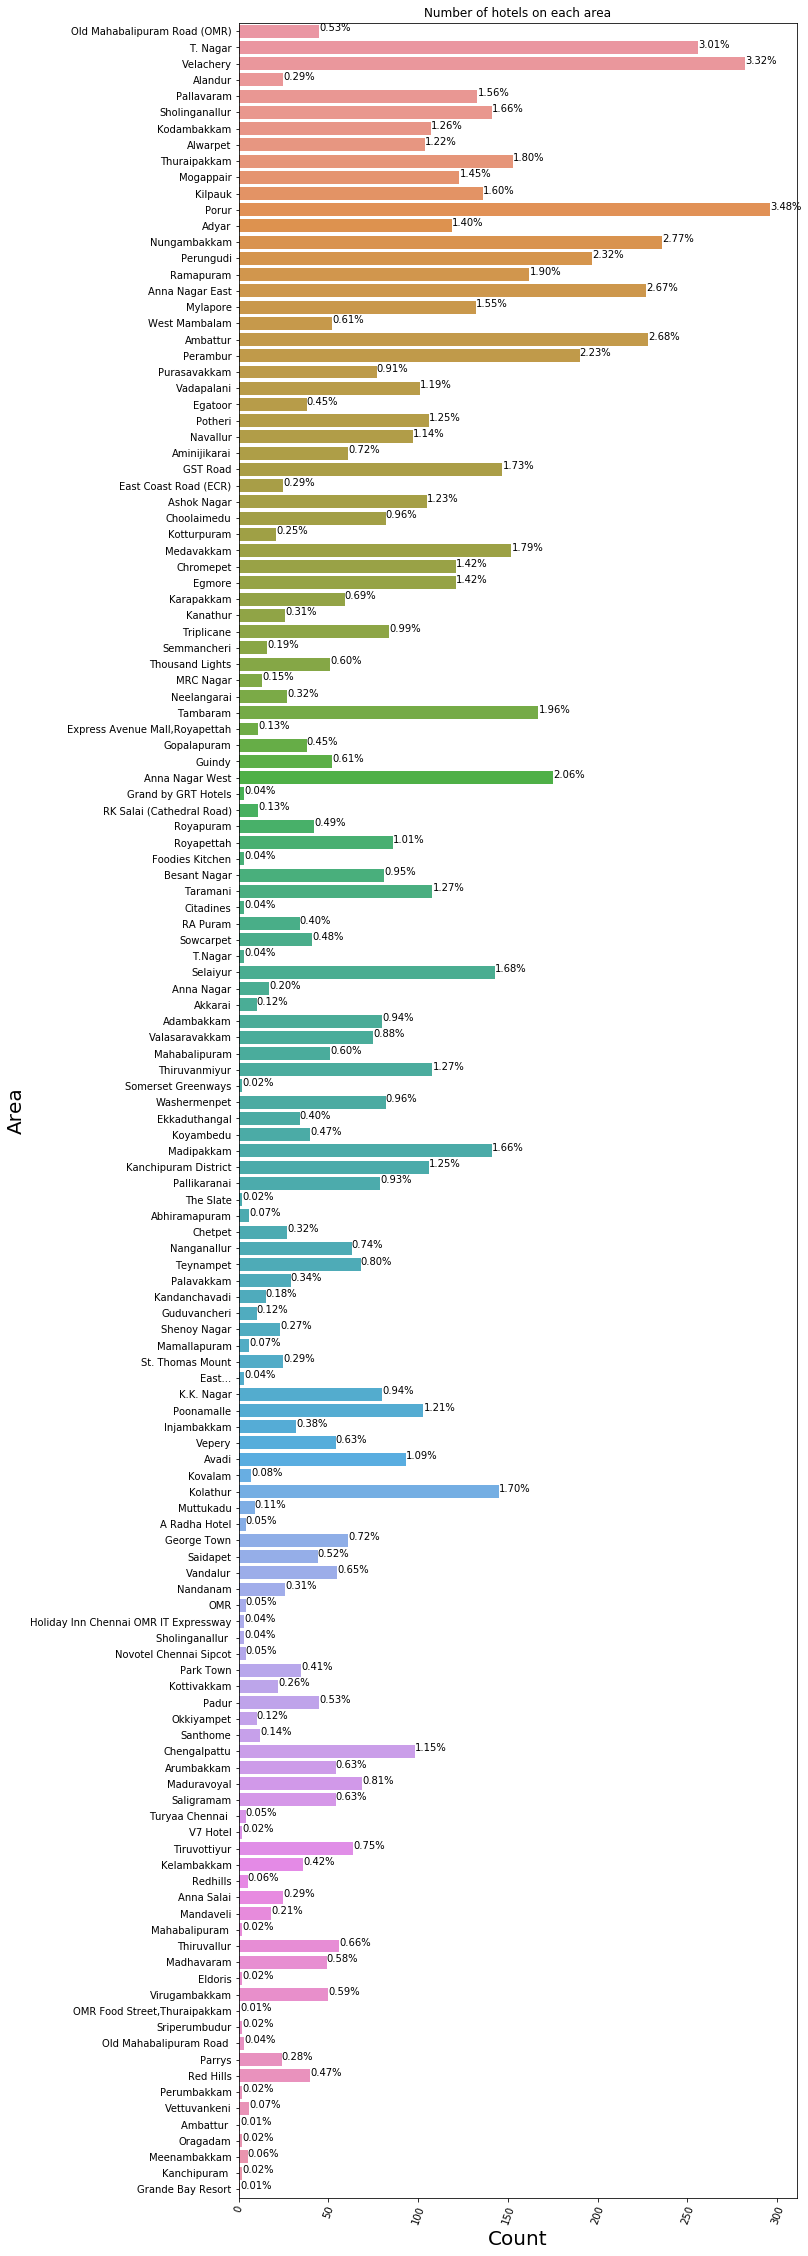

In [18]:
plt.subplots(figsize=[10,40])
ax = sns.countplot(data=df1,y='Ex_loc',)
plt.xticks(rotation=70)
plt.xlabel('Count',size = 20)
plt.ylabel('Area',size = 20)
plt.title('Number of hotels on each area')

total = len(df1['Ex_loc'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [19]:
df1 = df1.astype({'Ratings':np.float16})

In [20]:
##Finding average price for each area using Pivot table

table = pd.pivot_table(df1,index=['Ex_loc'],values=['Price for 2', 'Ratings'],
               aggfunc={'Price for 2':[np.mean],'Ratings':[np.mean]},fill_value=0)
table

,Price for 2,Ratings
,mean,mean
Ex_loc,,
A Radha Hotel,2050.000000,4.050781
Abhiramapuram,241.666667,3.824219
Adambakkam,287.500000,3.275391
Adyar,514.789916,3.689453
Akkarai,760.000000,3.533203
...,...,...
Vepery,304.629630,3.408203
Vettuvankeni,566.666667,3.150391


In [21]:
Area = list(table.index)
Price = list(table['Price for 2','mean'])
Rating = list(table['Ratings','mean'])

Avg_price_area = pd.DataFrame(list(zip(Area,Price,Rating)),columns=['Area','Average_Price','Ratings'])
Avg_price_area


,Area,Average_Price,Ratings
0,A Radha Hotel,2050.000000,4.050781
1,Abhiramapuram,241.666667,3.824219
2,Adambakkam,287.500000,3.275391
3,Adyar,514.789916,3.689453
4,Akkarai,760.000000,3.533203
...,...,...,...
129,Vepery,304.629630,3.408203
130,Vettuvankeni,566.666667,3.150391
131,Virugambakkam,341.000000,3.222656
132,Washermenpet,290.853659,3.347656


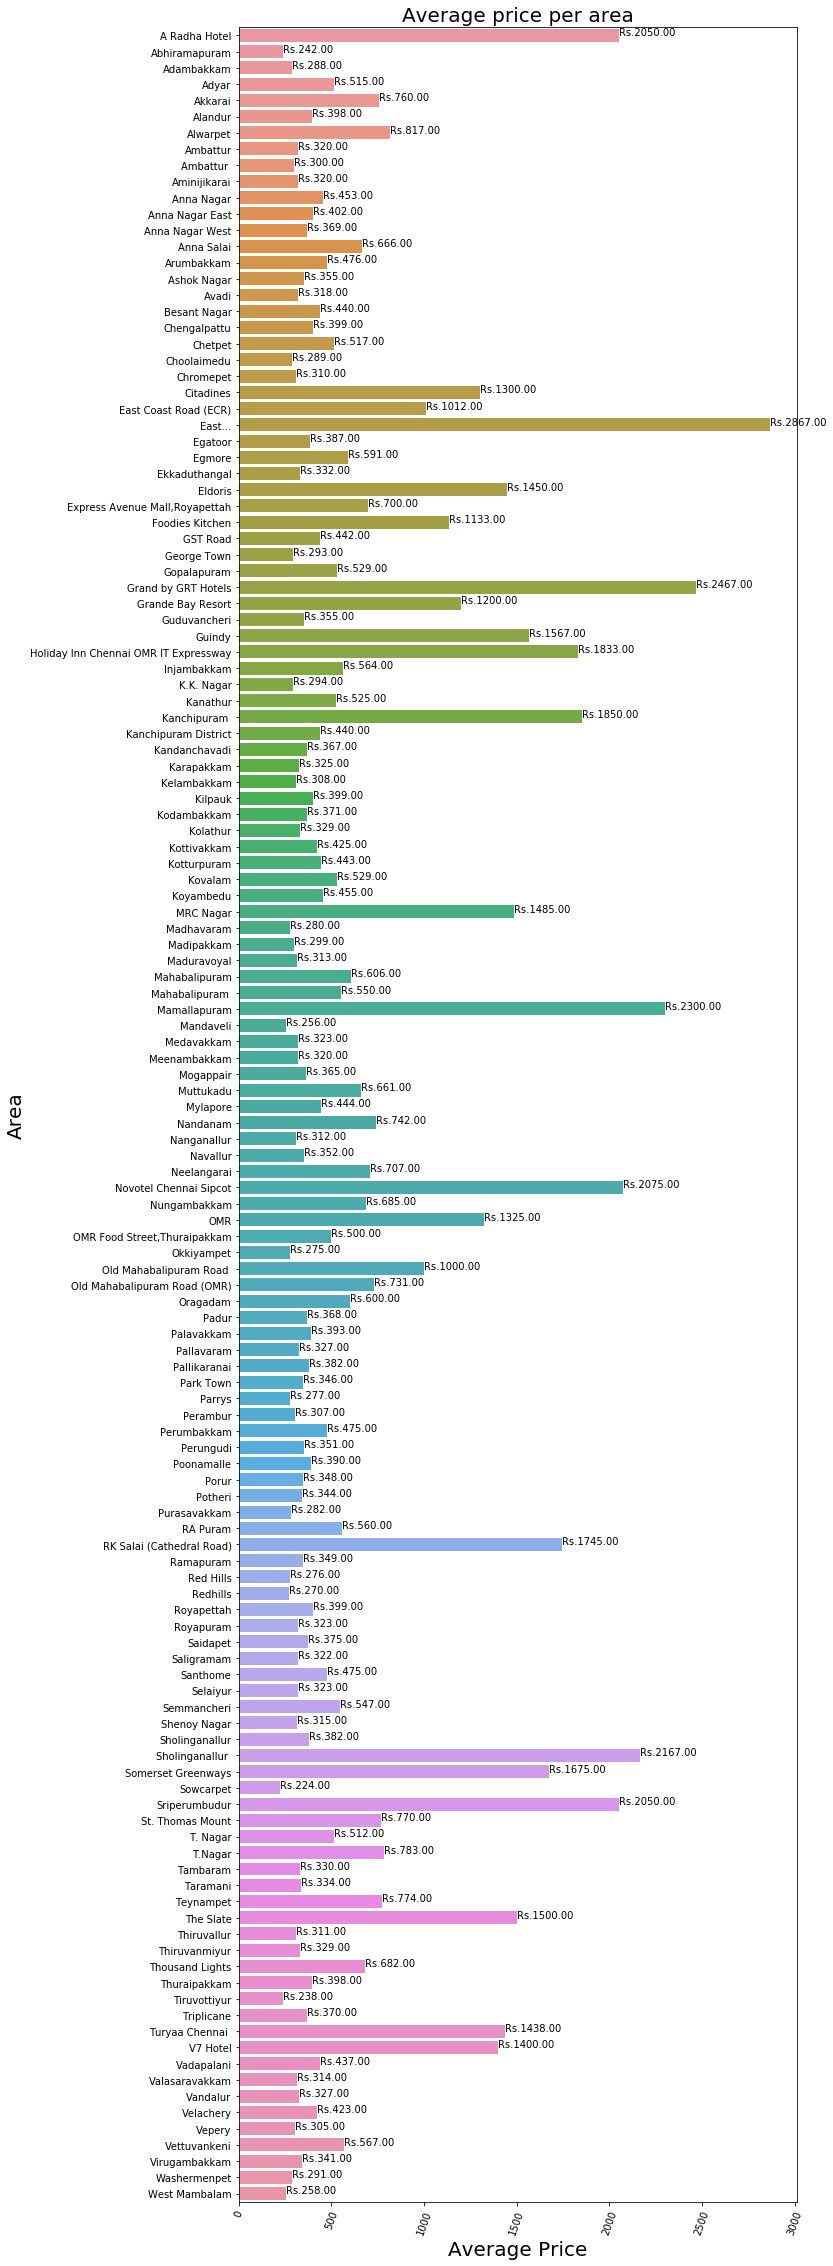

In [22]:
plt.subplots(figsize=[10,40])
ax = sns.barplot(data=Avg_price_area,y='Area',x='Average_Price')
plt.xticks(rotation=70)
plt.xlabel('Average Price',size = 20)
plt.ylabel('Area',size = 20)
plt.title('Average price per area', size=20)

for p,i in zip(ax.patches,Avg_price_area['Average_Price']):
        i = round(i,0)
        i = 'Rs.{:.2f}'.format(i)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(i, (x, y))

plt.show()

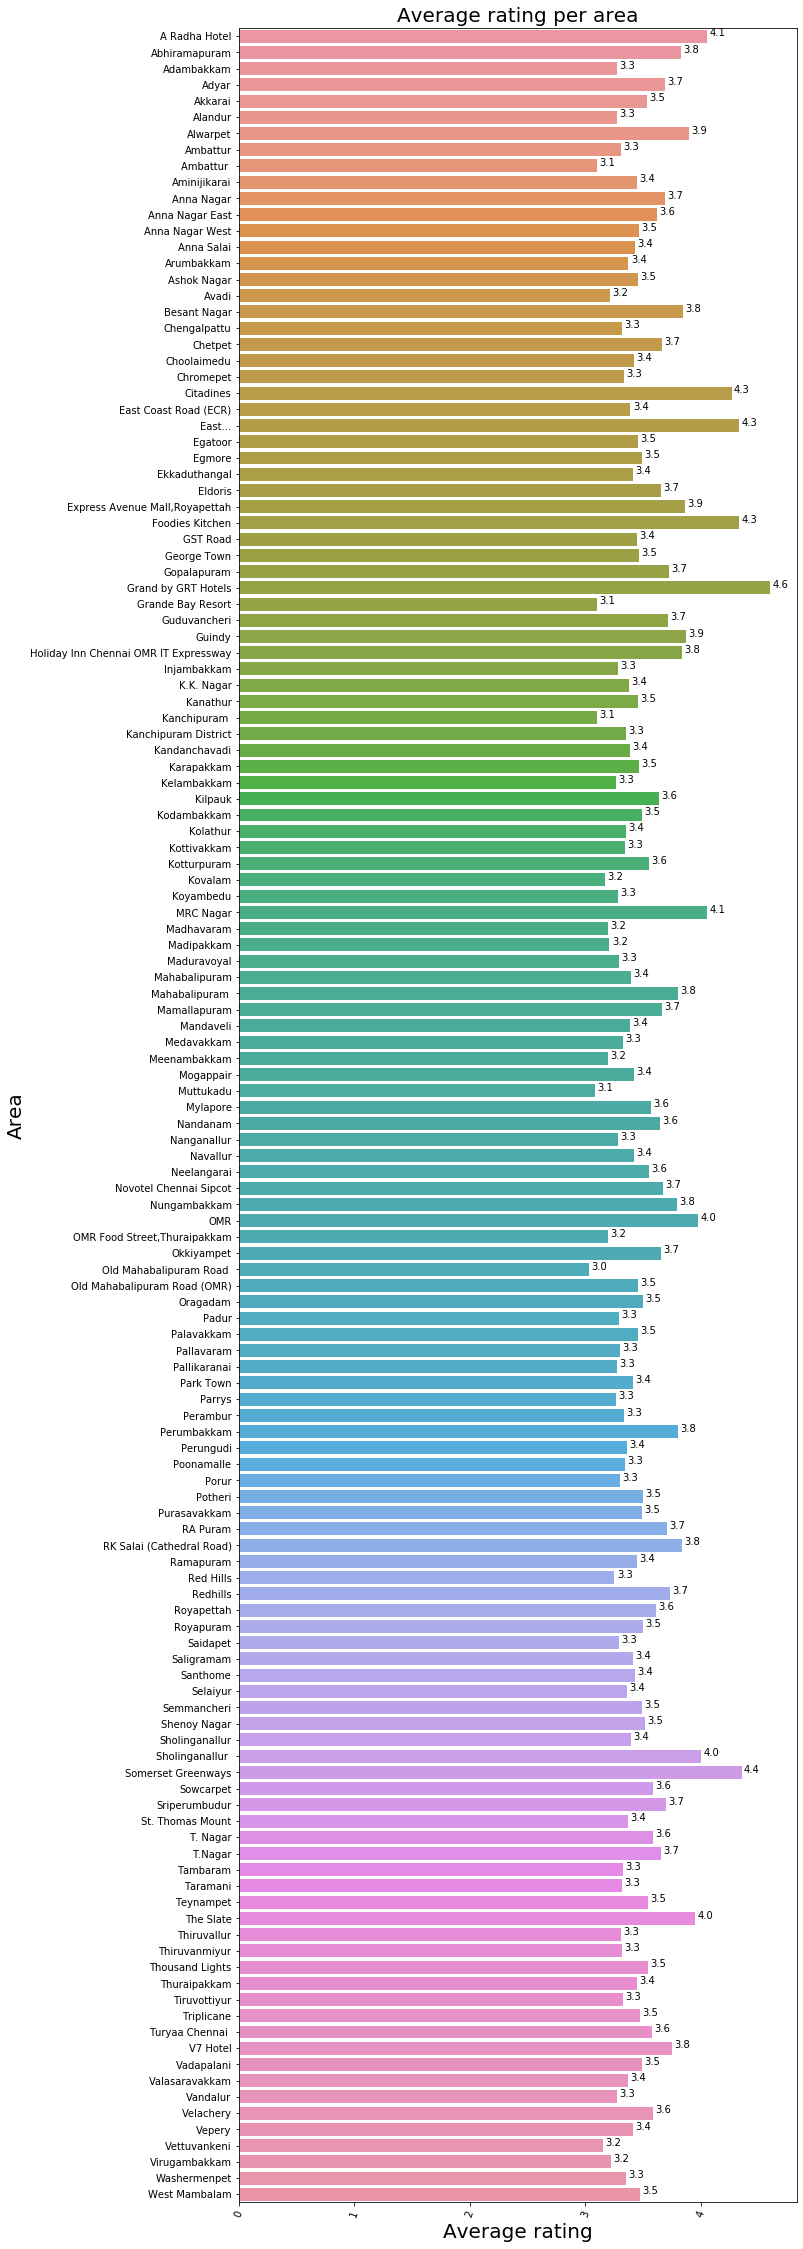

In [23]:
## Average rating on each area

plt.subplots(figsize=[10,40])
ax = sns.barplot(data=Avg_price_area,y='Area',x='Ratings')
plt.xticks(rotation=70)
plt.xlabel('Average rating',size = 20)
plt.ylabel('Area',size = 20)
plt.title('Average rating per area', size=20)

for p,i in zip(ax.patches,Avg_price_area['Ratings']):
        i = round(i,1)
        i = '{:.1f}'.format(i)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(i, (x, y))

plt.show()

In [24]:
food = []

for i in df1.Cuisine:
    str1 = ""
    str1 = (str1.join(i))
    str1 = str1.split(', ')
    food.append(str1)

In [25]:
food

[['North Indian', 'Street Food', 'Desserts', 'BBQ'],
 ['BBQ', 'North Indian', 'European'],
 ['Burger', 'Fast Food'],
 ['Biryani', 'North Indian', 'Mughlai', 'Desserts', 'Beverages'],
 ['North Indian', 'Chinese'],
 ['Biryani'],
 ['North Indian', 'Mughlai', 'Fast Food'],
 ['North Indian', 'Seafood', 'Continental', 'Pizza', 'Sushi'],
 ['Biryani', 'North Indian', 'Chinese', 'Arabian'],
 ['Biryani', 'Andhra', 'North Indian', 'Chinese'],
 ['South Indian'],
 ['Biryani', 'North Indian', 'Chinese'],
 ['South Indian', 'North Indian', 'Andhra', 'Chinese'],
 ['North Indian', 'Chinese', 'Seafood', 'South Indian', 'Biryani'],
 ['North Indian', 'Chinese', 'Chettinad', 'Seafood'],
 ['Continental'],
 ['Continental', 'Italian', 'Desserts'],
 ['South Indian', 'North Indian', 'Chinese', 'Fast Food'],
 ['Biryani', 'North Indian', 'Chinese'],
 ['North Indian', 'Chinese', 'Arabian', 'BBQ', 'Biryani', 'Beverages'],
 ['South Indian', 'North Indian', 'Chinese'],
 ['Asian',
  'Japanese',
  'Italian',
  'North In

In [26]:
f_category = []
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            f_category.append(i) 
            
for i in food:
    reemovNestings(i)

f_category

['North Indian',
 'Street Food',
 'Desserts',
 'BBQ',
 'BBQ',
 'North Indian',
 'European',
 'Burger',
 'Fast Food',
 'Biryani',
 'North Indian',
 'Mughlai',
 'Desserts',
 'Beverages',
 'North Indian',
 'Chinese',
 'Biryani',
 'North Indian',
 'Mughlai',
 'Fast Food',
 'North Indian',
 'Seafood',
 'Continental',
 'Pizza',
 'Sushi',
 'Biryani',
 'North Indian',
 'Chinese',
 'Arabian',
 'Biryani',
 'Andhra',
 'North Indian',
 'Chinese',
 'South Indian',
 'Biryani',
 'North Indian',
 'Chinese',
 'South Indian',
 'North Indian',
 'Andhra',
 'Chinese',
 'North Indian',
 'Chinese',
 'Seafood',
 'South Indian',
 'Biryani',
 'North Indian',
 'Chinese',
 'Chettinad',
 'Seafood',
 'Continental',
 'Continental',
 'Italian',
 'Desserts',
 'South Indian',
 'North Indian',
 'Chinese',
 'Fast Food',
 'Biryani',
 'North Indian',
 'Chinese',
 'North Indian',
 'Chinese',
 'Arabian',
 'BBQ',
 'Biryani',
 'Beverages',
 'South Indian',
 'North Indian',
 'Chinese',
 'Asian',
 'Japanese',
 'Italian',
 'North

In [27]:

food_category_df = pd.DataFrame({"Food" : f_category})
len(f_category)

19240

In [28]:
food_category_df.columns

Index(['Food'], dtype='object')

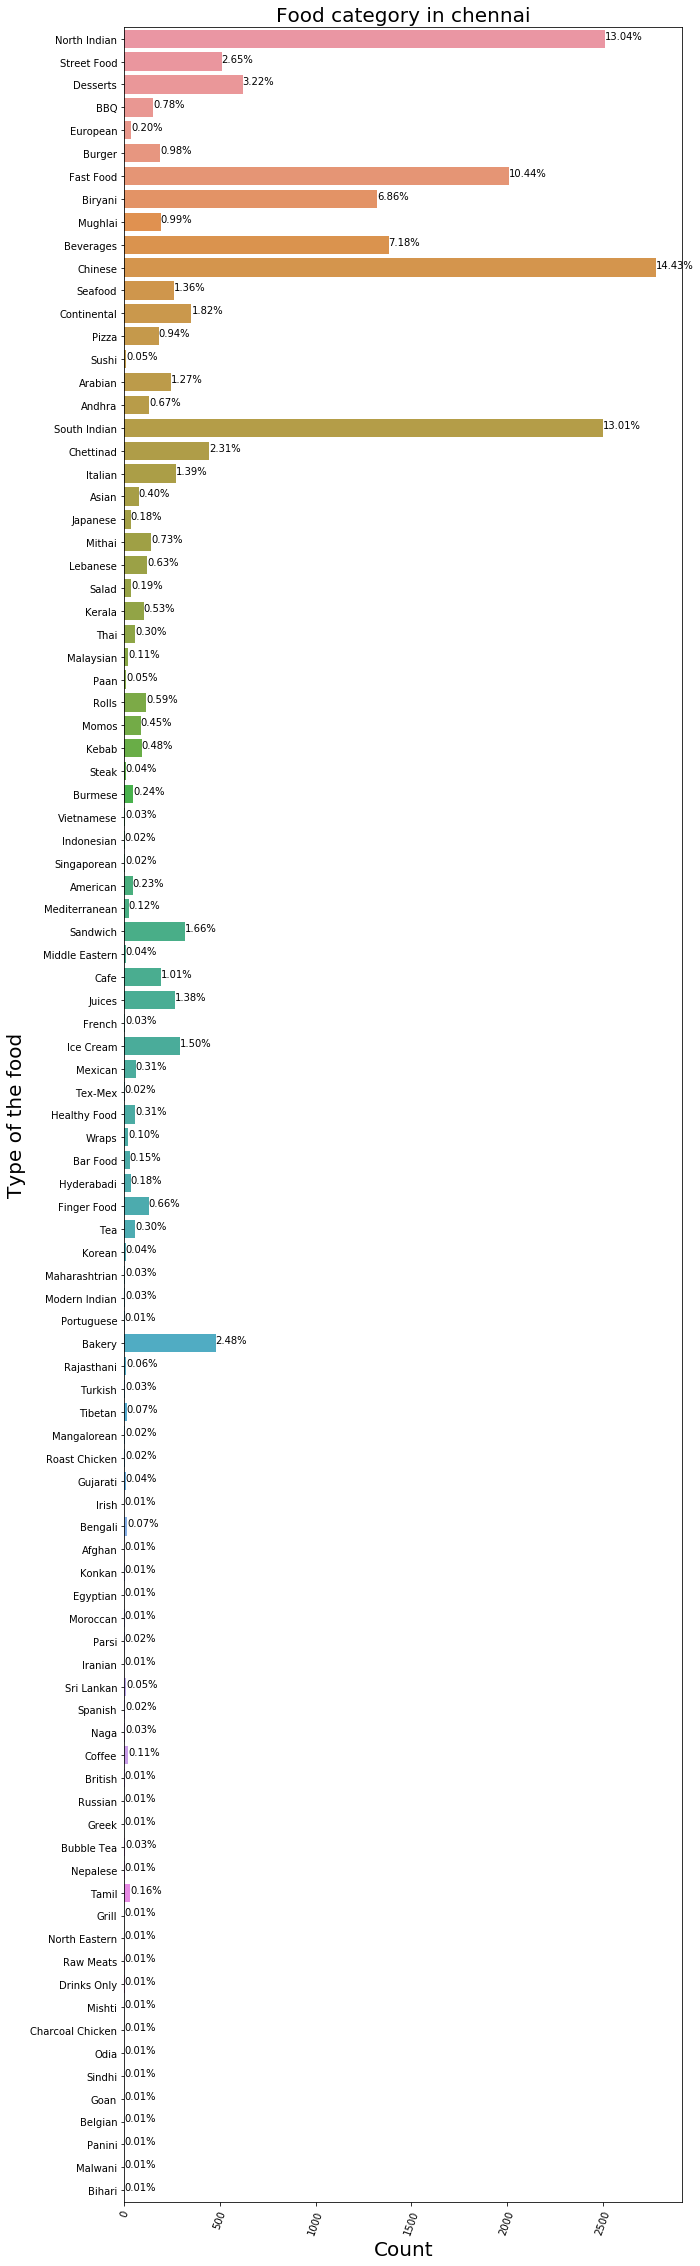

In [29]:
plt.subplots(figsize=[10,40])
ax = sns.countplot(data=food_category_df,y='Food')
plt.xticks(rotation=70)
plt.xlabel('Count',size = 20)
plt.ylabel('Type of the food',size = 20)
plt.title('Food category in chennai',size = 20)

total = len(food_category_df['Food'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Text(0.5, 1.0, 'Over all customer rating in chennai')

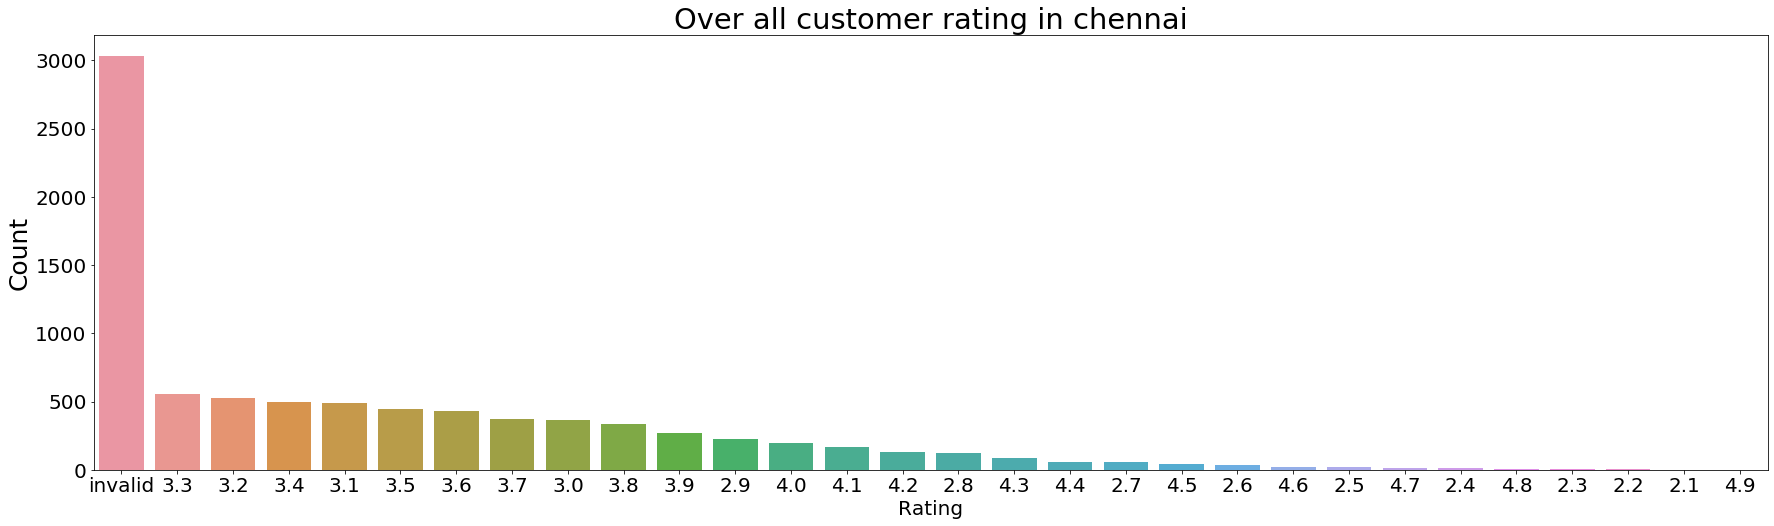

In [32]:
plt.subplots(figsize=[30,8])
sns.countplot(x='Ratings',data=df,order = df['Ratings'].value_counts().index)
plt.xticks(rotation=0,size = 20)
plt.yticks(rotation=0,size = 20)
plt.xlabel('Rating',size = 20)
plt.ylabel('Count',size = 25)
plt.title('Over all customer rating in chennai',size = 29)

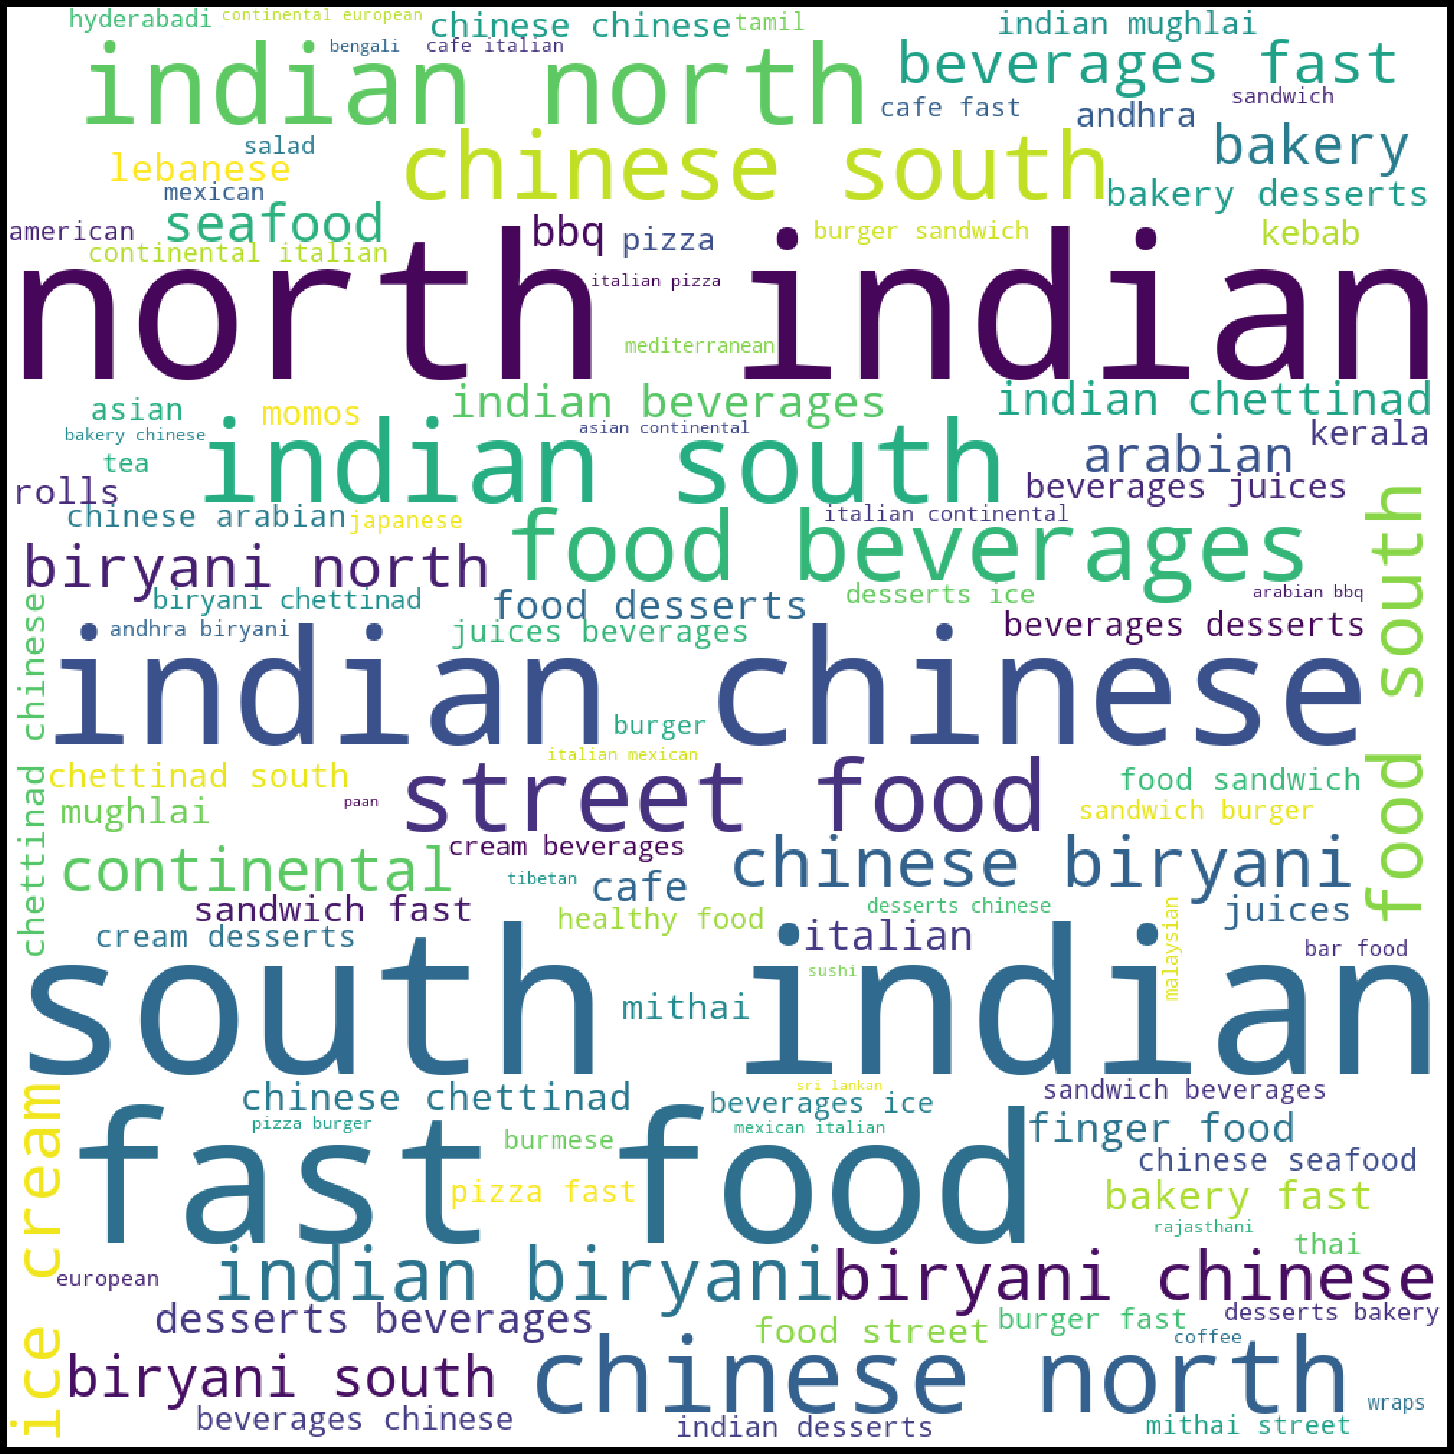

In [31]:
##Wordcloud

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in food_category_df.Food: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (50, 20), facecolor = 'black') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 